In [16]:
import pandas as pd
import numpy as np
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
import pickle
import plotly.express as px
import glob
import ast

%matplotlib inline

In [2]:
#load csv
df = pd.read_csv('namesAccsPacksTimes.csv')

In [31]:
df.head()

,dir,accuracies,packsRaw,code
0,prabhulingayya-titanic-prediction-using-logist...,0.766,"{'package:base': ['as.factor', 'gsub', 'is.na'...","training <- read.csv(""../input/train.csv"", str..."
1,erskumars-titanic-survival-eda-and-survival-ra...,0.769,"{'package:base': ['as.data.frame', 'as.numeric...",library(dplyr)\nlibrary(ggplot2)\nlibrary(rpar...
2,paulocressoni-titanic-using-stepwise-linear-re...,0.776,"{'character(0)': ['fill_age_by_title'], 'packa...","library(""MASS"")\nlibrary(""ggplot2"")\nlibrary(""..."
3,abhayjindal-exploring-survival-on-the-titanic,0.764,"{'c(""package:dplyr"", ""package:stats"")': ['filt...","library(""ggplot2"")\nlibrary(""ggthemes"")\nlibra..."
4,jonmak-identify-travel-groups-in-titanic,0.754,"{'character(0)': ['`:=`'], 'package:base': ['a...","system(""ls ../input"")\nlibrary(ggplot2)\nlibra..."


In [6]:
#add code
names = pd.read_csv('416_names_accuracies.csv')['names'].values

fs = []

for idx, name in enumerate(names):
    f = (glob.glob('./r/kernels/'+name+'/script/*.R') + glob.glob('./r/kernels/'+name+'/script/*.r'))[0]
    file = open(f).read().rstrip('\n')
    fs.append(file)
    
df['code'] = fs

df = df.drop_duplicates(subset=['code'], keep='first').reset_index()

In [9]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)

In [118]:
#helper function to flatten packages
def get_packs(lst):

    ps = []
    for p in lst:
        if p.startswith('c('):
            t = p[2:][:-1]
            s = t.split(', ')
            for i in s:
                ps.append(i[1:][:-1])
        else:
            ps.append(p)
            
        ps = list(set(ps))

    return ps

In [144]:
def clean_packs(lst):
    for i, p in enumerate(lst):
        if ':' in p:
            lst[i] = p.split(':')[1]
            
    return lst

In [149]:
packs = []
funcs = []

for p in df.packsRaw:
    
    packs.append(get_packs(list(ast.literal_eval(p).keys())))
    funcs.append([item for sublist in list(ast.literal_eval(p).values()) for item in sublist])
    
packs = [clean_packs(p) for p in packs]

In [150]:
df['packages'] = packs
df['functions'] = funcs

In [151]:
df.tail()

,dir,accuracies,packsRaw,code,packages,functions
314,anthobau-random-forest-titanic,0.757,"{'package:base': ['c', 'data.frame', 'factor',...",library(dplyr)\nlibrary(ggplot2)\nlibrary(grid...,"[randomForest, dplyr, gridExtra, mice, stats, ...","[c, data.frame, factor, gsub, is.na, library, ..."
315,maitree-titanic-survival-list-using-classifica...,0.766,"{'character(0)': ['cabin_no', 'mean_class'], '...","library(ggplot2)\nlibrary(readr)\nsystem(""ls ....","[character(0), stats, utils, ggplot2, base]","[cabin_no, mean_class, as.character, as.numeri..."
316,devanshugupta27-predicting-the-titanic-surviva...,0.774,"{'c(""package:dplyr"", ""package:stats"")': ['filt...",library(ggplot2)\nlibrary(lattice)\nlibrary(ca...,"[dplyr, stats, caret, utils, ggplot2, base]","[filter, c, character, data.frame, factor, gre..."
317,phubert-titanic-mackenzie-aula08,0.721,"{'package:base': ['as.matrix', 'c', 'data.fram...","library(tidyverse)\ndados = read.csv(""../input...","[reshape, xgboost, dplyr, stats, caret, utils,...","[as.matrix, c, data.frame, ifelse, is.na, leng..."
318,haroldzhang-titanic-ace233,0.790,"{'character(0)': ['fullfillAgeData', 'fullfill...","library(""randomForest"")\nreAssembleVariable = ...","[character(0), randomForest, stats, utils, base]","[fullfillAgeData, fullfillEmbark, fullfillFare..."


In [207]:
forest = []
neural = []
caret = []
mice = []
base = []
clas = []

glmnet = []
mass = []
car = []
xgboost = []
rpart = []
caretEnsemble = []
e1071 = []
rann = []
amelia = []
hmisc = []
missforest = []

user_defined = []



for p in df['packages']:
    
    if 'randomForest' in p:
        forest.append(1)
    else:
        forest.append(0)
        
    if 'neuralnet' in p:
        neural.append(1)
    else:
        neural.append(0)
    
    if 'caret' in p:
        caret.append(1)
    else:
        caret.append(0)
   
    if 'mice' in p:
        mice.append(1)
    else:
        mice.append(0)
   
    if 'class' in p:
        clas.append(1)
    else:
        clas.append(0)
    
    if 'glmnet' in p:
        glmnet.append(1)
    else:
        glmnet.append(0)
    
    if 'MASS' in p:
        mass.append(1)
    else:
        mass.append(0)
    
    if 'car' in p:
        car.append(1)
    else:
        car.append(0)
    
    if 'xgboost' in p:
        xgboost.append(1)
    else:
        xgboost.append(0)
    
    if 'rpart' in p:
        rpart.append(1)
    else:
        rpart.append(0)
    
    if 'caretEnsemble' in p:
        caretEnsemble.append(1)
    else:
        caretEnsemble.append(0)
    
    if 'e1071' in p:
        e1071.append(1)
    else:
        e1071.append(0)
    
    if 'RANN' in p:
        rann.append(1)
    else:
        rann.append(0)
    
    if 'Amelia' in p:
        amelia.append(1)
    else:
        amelia.append(0)
        
    if 'Hmisc' in p:
        hmisc.append(1)
    else:
        hmisc.append(0)
        
    if 'missForest' in p:
        missforest.append(1)
    else:
        missforest.append(0)
    
    if set(p).issubset(set(basep)):
        base.append(1)
    else:
        print('nope!')
        print(p)
        base.append(0)
        
    if 'character(0)' in p:
        user_defined.append(1)
    else:
        user_defined.append(0)

nope!
['dplyr', 'stats', 'utils', 'ggplot2', 'base', 'rpart']
nope!
['MASS', 'character(0)', 'stats', 'utils', 'base']
nope!
['randomForest', 'dplyr', 'stats', 'ggthemes', 'mice', 'ggplot2', 'utils', 'base', 'scales', 'graphics']
nope!
['data.table', 'character(0)', 'stringr', 'stats', 'caret', 'utils', 'ggplot2', 'base']
nope!
['corrplot', 'randomForest', 'dplyr', 'stats', 'ggthemes', 'utils', 'ggplot2', 'base', 'scales', 'grDevices', 'graphics', 'plyr']
nope!
['randomForest', 'dplyr', 'stats', 'ggthemes', 'mice', 'ggplot2', 'utils', 'base', 'scales', 'graphics']
nope!
['neuralnet', 'dplyr', 'stats', 'utils', 'base']
nope!
['randomForest', 'base', 'stats', 'utils']
nope!
['tidyr', 'randomForest', 'dplyr', 'stats', 'mice', 'ggthemes', 'ggplot2', 'utils', 'base', 'scales', 'graphics']
nope!
['randomForest', 'dplyr', 'stats', 'utils', 'ggplot2', 'base']
nope!
['base', 'stats', 'caret', 'utils']
nope!
['character(0)', 'randomForest', 'stats', 'utils', 'base']
nope!
['corrplot', 'character

In [208]:
df['forest'] = forest
df['neural'] = neural
df['caret'] = caret
df['mice'] = mice
df['base'] = base
df['glmnet'] = glmnet
df['mass'] = mass
df['car'] = car
df['xgboost'] = xgboost
df['rpart'] = rpart
df['caretEnsemble'] = caretEnsemble
df['e1071'] = e1071
df['rann'] = rann
df['amelia'] = amelia
df['hmisc'] = hmisc
df['missforest'] = missforest
df['userDefined'] = user_defined

In [191]:
runtimes = pd.read_csv('df_unique_one_hot.csv')['Runtime']

In [192]:
df['runtime'] = runtimes

(0.1, 0.9)

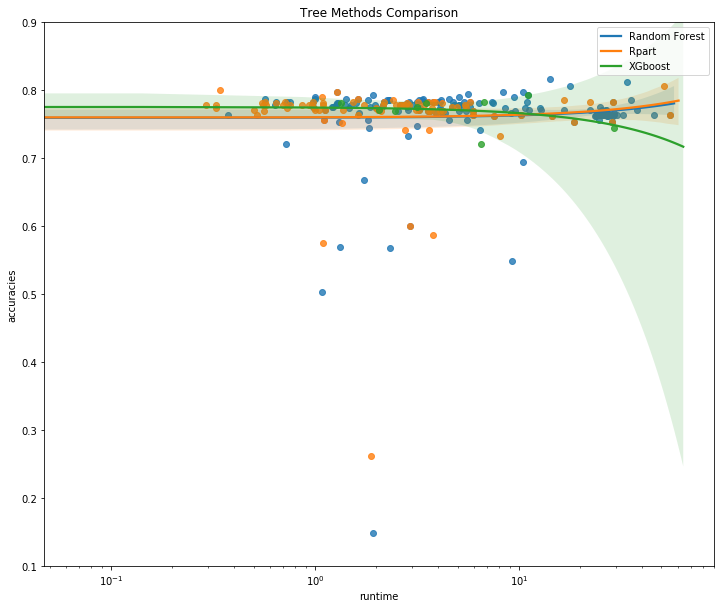

In [215]:
plt.figure(figsize=(12,10))
sns.regplot(x='runtime', y='accuracies', data=df[df['forest'] == 1])
sns.regplot(x='runtime', y='accuracies', data=df[df['rpart'] == 1])
sns.regplot(x='runtime', y='accuracies', data=df[df['xgboost'] == 1])
plt.xscale("log")
plt.legend(['Random Forest', 'Rpart', 'XGboost'])
plt.title('Tree Methods Comparison')
plt.ylim(0.1, 0.9)

(0.1, 0.9)

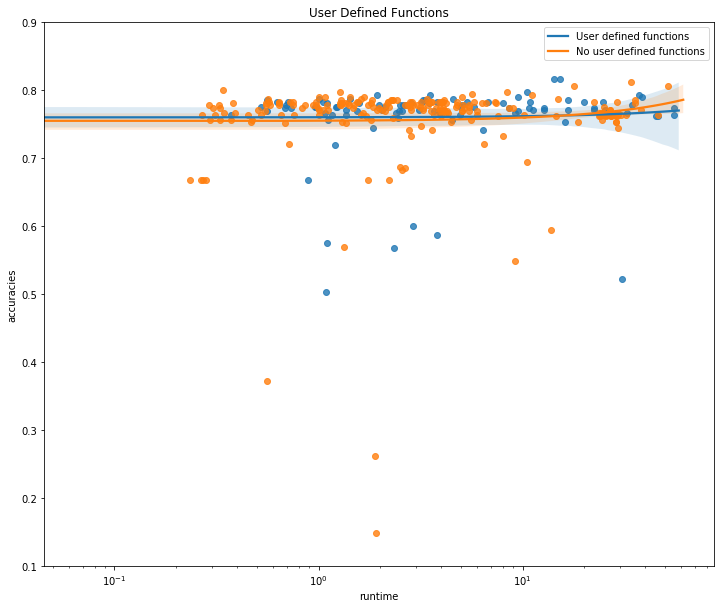

In [216]:
plt.figure(figsize=(12,10))
sns.regplot(x='runtime', y='accuracies', data=df[df['userDefined'] == 1])
sns.regplot(x='runtime', y='accuracies', data=df[df['userDefined'] == 0])
plt.xscale("log")
plt.legend(['User defined functions', 'No user defined functions'])
plt.title('User Defined Functions')
plt.ylim(0.1, 0.9)

(0.1, 0.9)

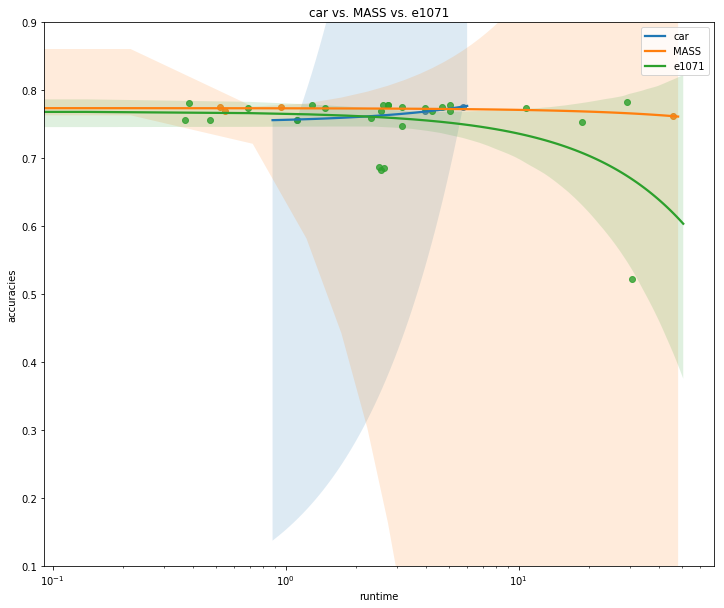

In [167]:
plt.figure(figsize=(12,10))
sns.regplot(x='runtime', y='accuracies', data=df[df['car'] == 1])
sns.regplot(x='runtime', y='accuracies', data=df[df['mass'] == 1])
sns.regplot(x='runtime', y='accuracies', data=df[df['e1071'] == 1])
plt.xscale("log")
plt.legend(['car', 'MASS', 'e1071'])
plt.title('car vs. MASS vs. e1071')
plt.ylim(0.1, 0.9)

(0.1, 0.9)

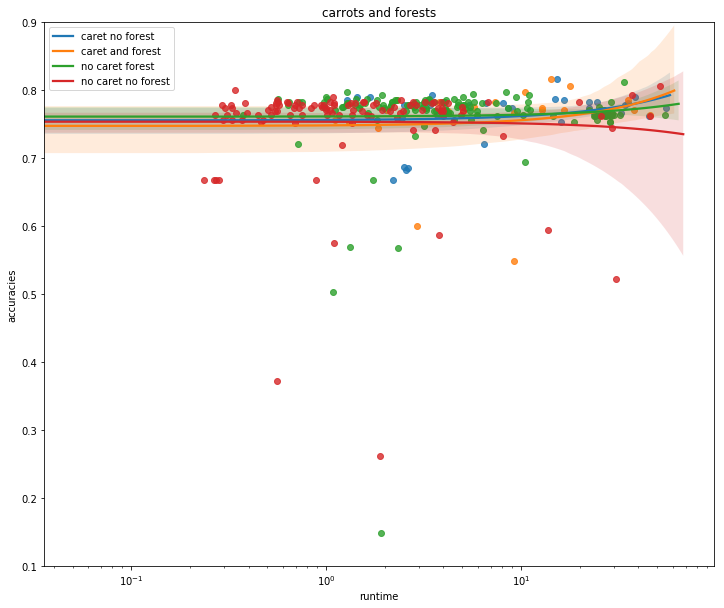

In [169]:
plt.figure(figsize=(12,10))
sns.regplot(x='runtime', y='accuracies', data = df[df['caret'] == 1][df[df['caret'] == 1]['forest'] == 0])
sns.regplot(x='runtime', y='accuracies', data = df[df['caret'] == 1][df[df['caret'] == 1]['forest'] == 1])
sns.regplot(x='runtime', y='accuracies', data = df[df['caret'] == 0][df[df['caret'] == 0]['forest'] == 1])
sns.regplot(x='runtime', y='accuracies', data = df[df['caret'] == 0][df[df['caret'] == 0]['forest'] == 0])
plt.xscale("log")
plt.legend(['caret no forest', 'caret and forest', 'no caret forest', 'no caret no forest'])
plt.title('carrots and forests')
plt.ylim(0.1, 0.9)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(0.1, 0.9)

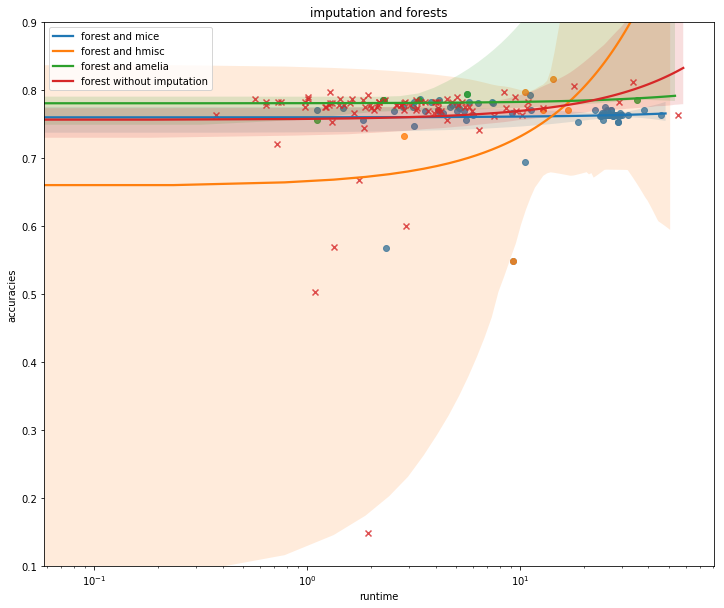

In [217]:
plt.figure(figsize=(12,10))
sns.regplot(x='runtime', y='accuracies', data = df[df['forest'] == 1][df[df['forest'] == 1]['mice'] == 1])
sns.regplot(x='runtime', y='accuracies', data = df[df['forest'] == 1][df[df['forest'] == 1]['hmisc'] == 1])
sns.regplot(x='runtime', y='accuracies', data = df[df['forest'] == 1][df[df['forest'] == 1]['amelia'] == 1])
sns.regplot(x='runtime', y='accuracies', data = df[df['forest'] == 1][(df[df['forest'] == 1]['mice'] == 0) & (df['hmisc'] == 0) & (df['amelia'] == 0) & (df['missforest'] == 0)], marker='x')
plt.xscale("log")
plt.legend(['forest and mice', 'forest and hmisc', 'forest and amelia', 'forest without imputation'])
plt.title('imputation and forests')
plt.ylim(0.1, 0.9)

In [206]:
basep = ['stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base']

In [172]:
df.tail()

,dir,accuracies,packsRaw,code,packages,functions,forest,neural,caret,mice,...,xgboost,rpart,caretEnsemble,e1071,rann,amelia,hmisc,missforest,userDefined,runtime
314,anthobau-random-forest-titanic,0.757,"{'package:base': ['c', 'data.frame', 'factor',...",library(dplyr)\nlibrary(ggplot2)\nlibrary(grid...,"[randomForest, dplyr, gridExtra, mice, stats, ...","[c, data.frame, factor, gsub, is.na, library, ...",1,0,0,1,...,0,0,0,0,0,0,0,0,0,5.557642
315,maitree-titanic-survival-list-using-classifica...,0.766,"{'character(0)': ['cabin_no', 'mean_class'], '...","library(ggplot2)\nlibrary(readr)\nsystem(""ls ....","[character(0), stats, utils, ggplot2, base]","[cabin_no, mean_class, as.character, as.numeri...",0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.076901
316,devanshugupta27-predicting-the-titanic-surviva...,0.774,"{'c(""package:dplyr"", ""package:stats"")': ['filt...",library(ggplot2)\nlibrary(lattice)\nlibrary(ca...,"[dplyr, stats, caret, utils, ggplot2, base]","[filter, c, character, data.frame, factor, gre...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.990692
317,phubert-titanic-mackenzie-aula08,0.721,"{'package:base': ['as.matrix', 'c', 'data.fram...","library(tidyverse)\ndados = read.csv(""../input...","[reshape, xgboost, dplyr, stats, caret, utils,...","[as.matrix, c, data.frame, ifelse, is.na, leng...",0,0,1,0,...,1,0,0,0,0,0,0,0,0,6.496891
318,haroldzhang-titanic-ace233,0.790,"{'character(0)': ['fullfillAgeData', 'fullfill...","library(""randomForest"")\nreAssembleVariable = ...","[character(0), randomForest, stats, utils, base]","[fullfillAgeData, fullfillEmbark, fullfillFare...",1,0,0,0,...,0,0,0,0,0,0,0,0,1,9.443184


In [211]:
set(df.packages[0]).issubset(set(basep))

True

In [212]:
df.packages[0]

['base', 'stats', 'utils']

In [213]:
basep

['stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base']

In [187]:
pacs = []

for p in df['packages']:
    
    pacs.append(list(set(p) - (set(p) & set(base))))

In [193]:
df['packagesNoBase'] = pacs

In [214]:
df[df['base'] == 1]

,dir,accuracies,packsRaw,code,packages,functions,forest,neural,caret,mice,...,rpart,caretEnsemble,e1071,rann,amelia,hmisc,missforest,userDefined,runtime,packagesNoBase
0,prabhulingayya-titanic-prediction-using-logist...,0.766,"{'package:base': ['as.factor', 'gsub', 'is.na'...","training <- read.csv(""../input/train.csv"", str...","[base, stats, utils]","[as.factor, gsub, is.na, mean, nrow, rbind, re...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.344873,[]
23,sawajid-titanic-test,0.668,"{'package:base': ['data.frame', 'library', 're...","library(randomForest)\ntrain <- read.csv(""../i...","[base, utils]","[data.frame, library, rep, summary, read.csv, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.266913,[]
44,stevencahill-titanic-machine-learning-from-dis...,0.764,"{'package:base': ['data.frame', 'prop.table', ...","train <- read.csv(file = ""../input/train.csv"",...","[base, utils]","[data.frame, prop.table, rep, table, head, rea...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.311542,[]
53,arjunmalhotra-titanic,0.752,"{'package:base': ['as.data.frame', 'as.factor'...","library(ggplot2)\nlibrary(readr)\nlist.files(""...","[base, stats, utils]","[as.data.frame, as.factor, ifelse, is.na, libr...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.688860,[]
102,zhaotianjing-titanic,0.668,"{'package:base': ['data.frame', 'rep', 'table'...","train <- read.csv(""../input/train.csv"")\ntest ...","[base, utils]","[data.frame, rep, table, read.csv, str, write....",0,0,0,0,...,0,0,0,0,0,0,0,0,0.280956,[]
113,amodi8-titanic-exploring-survival-using-machin...,0.764,"{'package:base': ['c', 'data.frame', 'jitter',...","library(ggplot2)\nlibrary(readr)\nsystem(""ls ....","[base, stats, graphics, utils]","[c, data.frame, jitter, length, library, prop....",0,0,0,0,...,0,0,0,0,0,0,0,0,0.756254,[]
228,analyticsdojo-titanic-baseline-models-analytic...,0.668,"{'package:base': ['c', 'names'], 'package:util...","train <- read.csv(""../input/train.csv"", string...","[base, utils]","[c, names, head, read.csv, write.csv]",0,0,0,0,...,0,0,0,0,0,0,0,0,0.235375,[]
230,sudheer464-prediction-1-on-titanic-dataset,0.668,"{'package:base': ['data.frame', 'prop.table', ...","train <- read.csv(""../input/train.csv"")\ntest ...","[base, utils]","[data.frame, prop.table, rep, table, read.csv,...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.272779,[]
234,macrosp-logistic-regression-titanic-dataset,0.757,"{'package:base': ['as.numeric', 'cat', 'data.f...","library(MASS)\ntest <- read.csv(""../input/test...","[base, stats, utils]","[as.numeric, cat, data.frame, factor, ifelse, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.330227,[]
244,qianbi-titanic-logistic,0.757,"{'package:base': ['c', 'factor', 'is.na', 'rou...","data_train <- read.csv(""../input/train.csv"", s...","[base, stats, utils]","[c, factor, is.na, round, glm, predict, read.c...",0,0,0,0,...,0,0,0,0,0,0,0,0,0.293961,[]
